# <center>Lecture 05: Neural Networks</center>

## 1. Simple Neural Network Binary Classification Example

See the lecture slide \#39.
![NN](NN_Example.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_train = np.array([0.7, 0.1, 0.3, 0.5])
y_train = np.array([1, 0, 0, 1])
w1 = np.array([[0.16, 0.16],[0.02, 0.25],[0.63, 0.22],[0.36, 0.29]])
w2 = np.array([[0.05, 0.33, 0.72, 0.5],[0.43, 0.79, 0.91, 0.85]])

#### Forward Propagation
* The linaer combination from the input layer: $ a=\sum W_1X $
* The nonlinear activation function: $\sigma(a)=\frac{1}{1+e^{-a}}$
* The hidden layer output $Z$: $Z=\sigma(a)$
* The output layer output $\hat{Y}$: $\hat{Y} = \sigma(W_2 Z)$
* The error function: $E=\frac{1}{2}\sum (\hat{Y}-Y)^2$

In [3]:
def ffNN(w,x):
    z = sigmoid(np.dot(x,w))
    return z

def sigmoid(x):
    return 1/(1+np.exp(-x));

In [4]:
def _delta(y,ypred):
    return ypred-y

def _cost(y,ypred):
    cost = np.sum(_delta(y,ypred)**2)/2
    return cost

In [5]:
## hidden layer
z1 = ffNN(w1,x_train)

## output layer
yhat = ffNN(w2,z1)

In [6]:
print(_cost(y_train,yhat))

0.6224196291011675


### Error Backpropagation: Output layer to hidden layer
* The error on output layer: $\delta_2 = \hat{Y}-Y$ where $\hat{Y}$ is the predicted value. 
* The dradient of Error: $\nabla E = \frac{\partial E}{\partial W_2} = \sum\delta_2 Z$
* The update $W_2$ value: $\hat{W}_2 = W_2 + \Delta W_2 = W_2 - \eta\nabla E$

In [7]:
delta2 = _delta(y_train,yhat)
print(delta2)

[-0.4297283   0.66086138  0.72684402 -0.30843615]


In [8]:
eta = 1
delta_w2 = eta*np.dot(delta2.reshape(-1,1),z1.reshape(-1,1).T).T
print(delta_w2)

w2_new = w2 - eta*delta_w2
print(w2_new)

[[-0.26576806  0.4087137   0.44952107 -0.1907542 ]
 [-0.25187772  0.38735233  0.4260269  -0.18078445]]
[[ 0.31576806 -0.0787137   0.27047893  0.6907542 ]
 [ 0.68187772  0.40264767  0.4839731   1.03078445]]


### Error Backpropagation: Hidden layer to input layer
* The error on the hidden layer: $\delta_1 = \sigma'(z)\sum\delta_2 W_2$ where $\sigma'(z) = \sigma(z)[1-\sigma(z)]$.
* The update of $W_1$: $\hat{W}_1 = W_1 + \Delta W_1 = W_1 - \eta\delta_1 X$ 

In [9]:
def sigmoid_prime(x):
    return sigmoid(x)*(1-sigmoid(x))

In [10]:
delta1 = np.dot(delta2.reshape(-1,1).T,w2.T)*sigmoid_prime(z1).reshape(-1,1).T
print(delta1)
delta_w1 = np.dot(x_train.reshape(-1,1),delta1.reshape(-1,1).T)
print(delta_w1)
w1_new = w1-np.dot(x_train.reshape(-1,1),delta1.reshape(-1,1).T)
print(w1_new)

[[0.12872096 0.16918677]]
[[0.09010467 0.11843074]
 [0.0128721  0.01691868]
 [0.03861629 0.05075603]
 [0.06436048 0.08459339]]
[[0.06989533 0.04156926]
 [0.0071279  0.23308132]
 [0.59138371 0.16924397]
 [0.29563952 0.20540661]]


### Prediction with updated $W_1$ and $W_2$:

In [11]:
z_new = ffNN(w1_new, x_train)
y_new = ffNN(w2_new, z_new)
print(y_new)
_cost(y_train,y_new)

[0.63715745 0.5437198  0.60518216 0.72663708]


0.4341293351273783

Result: SSE dropped from 0.62 to 0.43.
Using gradient descent approach, update $W_1$ and $W_2$ until all input neurons are correctly classified.  

In [12]:
def fBNN(x,y,w1,w2,eta,epoch):
    cost_list = []
    epoch_list = []
    for i in range(1,epoch+1):
        """
        forward propagation
        """
        z1 = ffNN(w1,x)
        yhat = ffNN(w2,z1)
        cost = _cost(y,yhat)
        
        """
        backpropagation from the output layer to the hidden layer
        """
        delta2 = _delta(y,yhat)
        delta_w2 = np.dot(delta2.reshape(-1,1),z1.reshape(-1,1).T).T
        w2 = w2 - eta * delta_w2
    
        """
        backpropagation from the hidden layer to the input layer
        """        
        #delta1 = np.dot(sigmoid_prime(z1),np.dot(w2,delta2))
        delta1 = np.dot(delta2.reshape(-1,1).T,w2.T)*sigmoid_prime(z1).reshape(-1,1).T
        delta_w1 = np.dot(x.reshape(-1,1),delta1.reshape(-1,1).T)
        w1 = w1 - eta * delta_w1
        
        """
        forward propagation with new weights
        """
        z1_new = ffNN(w1,x)
        yhat_new = ffNN(w2,z1_new)
        cost_new = _cost(y,yhat_new)
        
        if i>=1 and cost_new >=5E-3:
            epoch_list.append(i)
            cost_list.append(cost)
        if i > 1 and cost_new <= 5E-3:
            print("epoch:",i,"cost:",cost)
            print(yhat_new)
            break
            
    plt.plot(epoch_list, cost_list)
    plt.xlabel('epoch')
    plt.ylabel('cost')
    plt.show()

epoch: 14 cost: 0.0052804958782079634
[0.95710324 0.05108906 0.05327247 0.96261145]


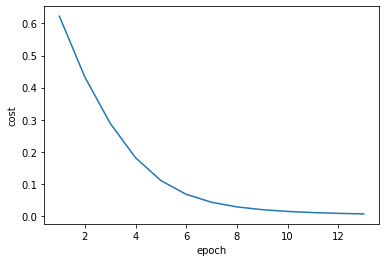

In [13]:
fBNN(x_train, y_train, w1, w2, 1, 20)

## 2. Scikit-learn Neural Network

* Classification: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

* Regression: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

In [14]:
import numpy as np
from sklearn import datasets
## prepare data
iris = datasets.load_iris()
index = range(100)
iris.x = iris.data[index, :]
iris.y = iris.target[index]

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [16]:
clf = MLPClassifier(solver='sgd',alpha=1E-4,activation='logistic')
clf.fit(iris.x[:, 0:2], iris.y)
iris_pred = clf.predict(iris.x[:, 0:2])
print(clf.score(iris.x[:,0:2], iris.y))
print(accuracy_score(iris.y,iris_pred))

0.5
0.5


In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
confusion_matrix(iris.y,iris_pred)

array([[ 0, 50],
       [ 0, 50]])

In [19]:
accuracy_rate = (8+37)/(8+42+13+37)
print(accuracy_rate)

0.45


In [20]:
def plot_model(model, x, y, label):
    '''
    model: a fitted model
    x, y: two variables, should arrays
    label: true label
    '''
    margin = 0.5
    x_min = x.min() - margin
    x_max = x.max() + margin
    y_min = y.min() - margin
    y_max = y.max() + margin
    import  matplotlib.pyplot as plt
    from matplotlib import colors
    col_dict = {
        'red': [(0, 1, 1), (1, 0.7, 0.7)],
        'green': [(0, 1, 0.5), (1, 0.7, 0.7)],
        'blue': [(0, 1, 0.5), (1, 1, 1)]
    }
    cmap = colors.LinearSegmentedColormap('red_blue_classes', col_dict)
    plt.cm.register_cmap(cmap=cmap)
    nx, ny = 200, 200
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, nx),
        np.linspace(y_min, y_max, ny)
    )
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ## plot colormap
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes')
    ## plot boundaries
    plt.contour(xx, yy, Z, [0.5], linewidths=1., colors='k')
    plt.contour(xx, yy, Z, [1], linewidths=1., colors='k')
    ## plot scatters and true labels
    plt.scatter(x, y, c=label, edgecolors='k')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    ## if it's a SVM model
    if hasattr(model, 'support_'):
        # if it's a SVC, plot the support vectors
        index = model.support_
        plt.scatter(x[index], y[index], c=label[index], s=200, alpha=0.33, edgecolors='k')

/var/folders/zs/85jcdr693vl6m_zcql7t8f0h0000gn/T/ipykernel_2795/4100117509.py:32: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, Z, [1], linewidths=1., colors='k')


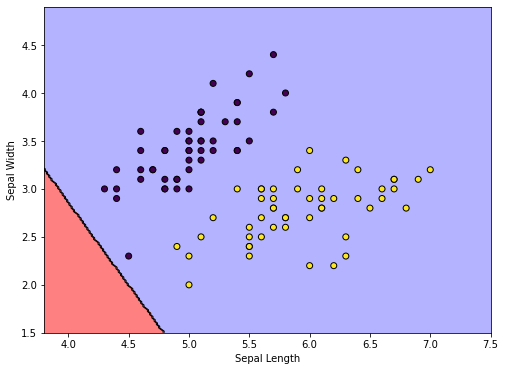

In [21]:
plt.rcParams['figure.figsize'] = 8, 6
clf.fit(iris.data[index, 0:2], iris.target[index])
plot_model(clf, iris.data[index, 0], iris.data[index, 1], iris.target[index])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [22]:
clf.fit(iris.data[:, 2:4], iris.target) # fit on all the observations
clf.score(iris.data[:, 2:4], iris.target) # accuracy

/Users/insuk/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.6866666666666666

/var/folders/zs/85jcdr693vl6m_zcql7t8f0h0000gn/T/ipykernel_2795/4100117509.py:20: UserWarning: Trying to register the cmap 'red_blue_classes' which already exists.
  plt.cm.register_cmap(cmap=cmap)


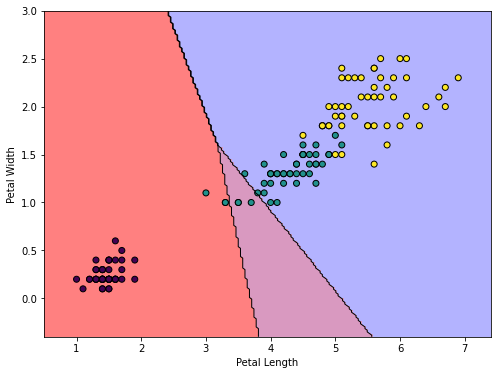

In [23]:
plot_model(clf, iris.data[:, 2], iris.data[:, 3], iris.target)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

## 3. Neural Network Implementation



In [24]:
# Base class: handles simple properties (input, output, and forward and backward propagations)
class Layer: 
    def __init__(self):
        self.input = None
        self.output = None
        
    # Compute the output Y of a layer for a given input X.
    def forward_propagation(self, input):
        raise NotImplementedError
    
    # computes dE/dX for a given dE/dY and update parameters.
    def backward_propagation(self, output_error, learning_rate):
        raise NotImplementedError

In [25]:
# Inherit from base class Layer
# Fully connected NN
class FCLayer(Layer):
    def __init__(self, input_size, output_size):
        """
        input_size: number of input neurons
        output_size: number of output neurons
        """
        self.weights = np.random.rand(input_size, output_size) - 0.5
        self.bias = np.random.rand(1, output_size) - 0.5
        
    def forward_propagation(self, input_data):
        """
        Return output for a given input.
        """
        self.input = input_data
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output
    
    def backward_propagation(self, output_error, learning_rate):
        """
        Computes dE/dW, dE/dB for a given output_error=dE/dY. 
        Returns input_error=dE/dX.
        """
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)
        
        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        
        return input_error

In [26]:
# inherit from base class Layer
class ActivationLayer(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    # returns the activated input
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = self.activation(self.input)
        return self.output

    # Returns input_error=dE/dX for a given output_error=dE/dY.
    # learning_rate is not used because there is no "learnable" parameters.
    def backward_propagation(self, output_error, learning_rate):
        return self.activation_prime(self.input) * output_error

In [27]:
# activation function and its derivative
def sigmoid(x):
    return 1/(1+np.exp(-x));

def sigmoid_prime(x):
    return sigmoid(x)*(1-sigmoid(x));

In [28]:
# loss function and its derivative
def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2));

def mse_prime(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size;

In [29]:
class Network:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_prime = None

    # add layer to network
    def add(self, layer):
        self.layers.append(layer)

    # set loss to use
    def use(self, loss, loss_prime):
        self.loss = loss
        self.loss_prime = loss_prime

    # predict output for given input
    def predict(self, input_data):
        # sample dimension first
        samples = len(input_data)
        result = []

        # run network over all samples
        for i in range(samples):
            # forward propagation
            output = input_data[i]
            for layer in self.layers:
                output = layer.forward_propagation(output)
            result.append(output)

        return result

    # train the network
    def fit(self, x_train, y_train, epochs, learning_rate):
        # sample dimension first
        samples = len(x_train)

        # training loop
        for i in range(epochs):
            err = 0
            for j in range(samples):
                # forward propagation
                output = x_train[j]
                for layer in self.layers:
                    output = layer.forward_propagation(output)

                # compute loss (for display purpose only)
                err += self.loss(y_train[j], output)

                # backward propagation
                error = self.loss_prime(y_train[j], output)
                for layer in reversed(self.layers):
                    error = layer.backward_propagation(error, learning_rate)

            # calculate average error on all samples
            err /= samples
            print('epoch %d/%d   error=%f' % (i+1, epochs, err))

In [30]:

# training data
x_train = np.array([[[0.7]], [[0.3]], [[0.1]], [[0.5]]])
y_train = np.array([[[1]], [[0]], [[0]], [[1]]])

# network
net = Network()
net.add(FCLayer(1, 2))
net.add(ActivationLayer(sigmoid, sigmoid_prime))
net.add(FCLayer(2, 1))
net.add(ActivationLayer(sigmoid, sigmoid_prime))

# train
net.use(mse, mse_prime)
net.fit(x_train,y_train, epochs=1000, learning_rate=0.5)

# test
out = net.predict(x_train)
print(out)

epoch 1/1000   error=0.279750
epoch 2/1000   error=0.276372
epoch 3/1000   error=0.274560
epoch 4/1000   error=0.273567
epoch 5/1000   error=0.272987
epoch 6/1000   error=0.272610
epoch 7/1000   error=0.272332
epoch 8/1000   error=0.272101
epoch 9/1000   error=0.271890
epoch 10/1000   error=0.271686
epoch 11/1000   error=0.271485
epoch 12/1000   error=0.271281
epoch 13/1000   error=0.271074
epoch 14/1000   error=0.270862
epoch 15/1000   error=0.270645
epoch 16/1000   error=0.270422
epoch 17/1000   error=0.270193
epoch 18/1000   error=0.269957
epoch 19/1000   error=0.269714
epoch 20/1000   error=0.269464
epoch 21/1000   error=0.269206
epoch 22/1000   error=0.268941
epoch 23/1000   error=0.268666
epoch 24/1000   error=0.268384
epoch 25/1000   error=0.268092
epoch 26/1000   error=0.267790
epoch 27/1000   error=0.267479
epoch 28/1000   error=0.267158
epoch 29/1000   error=0.266825
epoch 30/1000   error=0.266482
epoch 31/1000   error=0.266127
epoch 32/1000   error=0.265761
epoch 33/1000   e